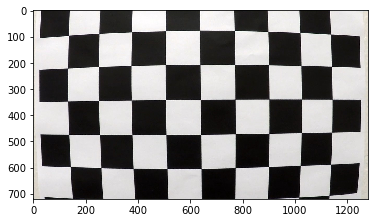

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

img = mpimg.imread('camera_cal/calibration1.jpg')
plt.imshow(img)

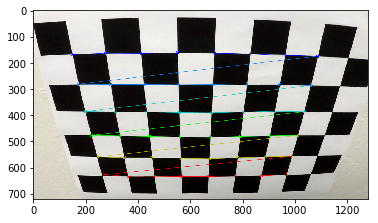

In [2]:
import glob

images = glob.glob('camera_cal/calibration*.jpg')

objpoints = []
imgpoints = []

objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)

for fname in images:
    img = mpimg.imread(fname)
# Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (8, 6), None)

# If found, draw corners
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
    
    # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (8, 6), corners, ret)
        plt.imshow(img)
        

In [3]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

In [4]:
dst = cv2.undistort(img, mtx, dist, None, mtx)

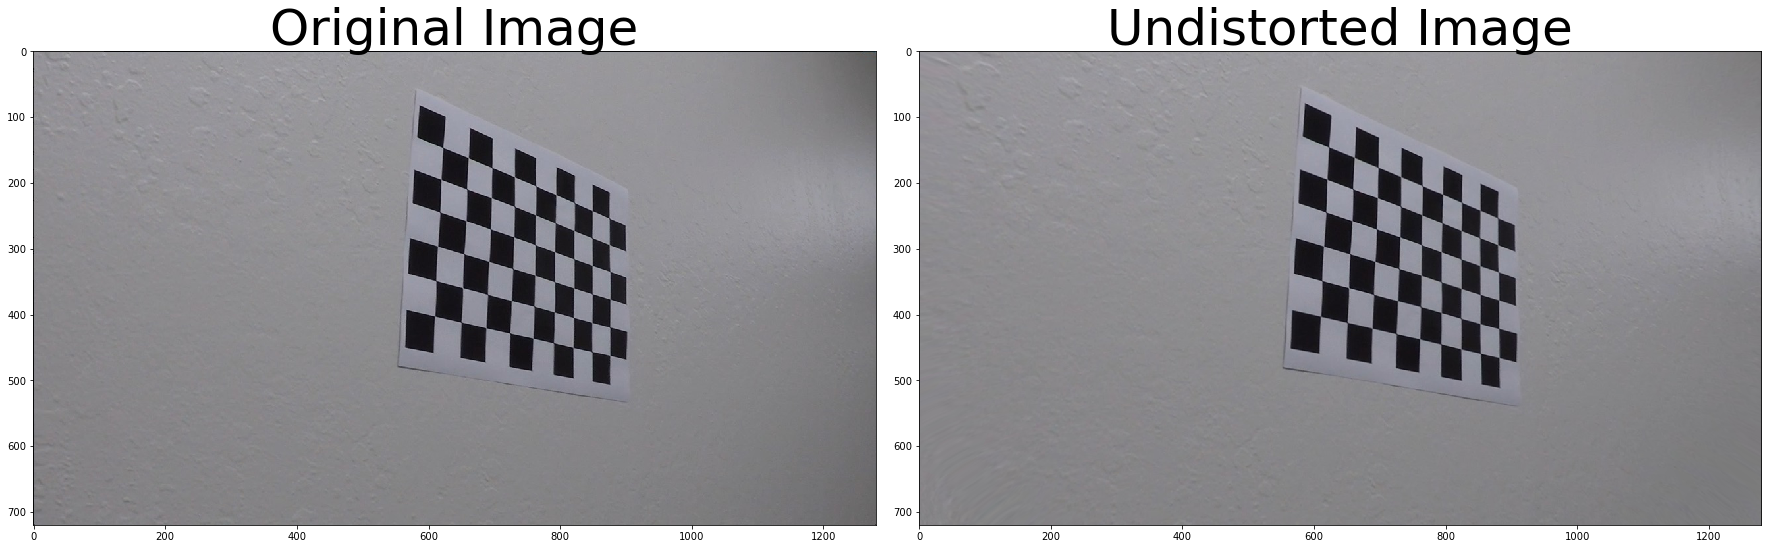

In [5]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [7]:
def warp(img):
    img_size = (img.shape[1], img.shape[0])
    
    src = np.float32(
                [[(img_size[0] / 2) - 55, img_size[1] / 2 + 100],
                [((img_size[0] / 6) - 10), img_size[1]],
                [(img_size[0] * 5 / 6) + 60, img_size[1]],
                [(img_size[0] / 2 + 55), img_size[1] / 2 + 100]])
    dst = np.float32(
                [[(img_size[0] / 4), 0],
                [(img_size[0] / 4), img_size[1]],
                [(img_size[0] * 3 / 4), img_size[1]],
                [(img_size[0] * 3 / 4), 0]])
    
    M = cv2.getPerspectiveTransform(src, dst)
    
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped

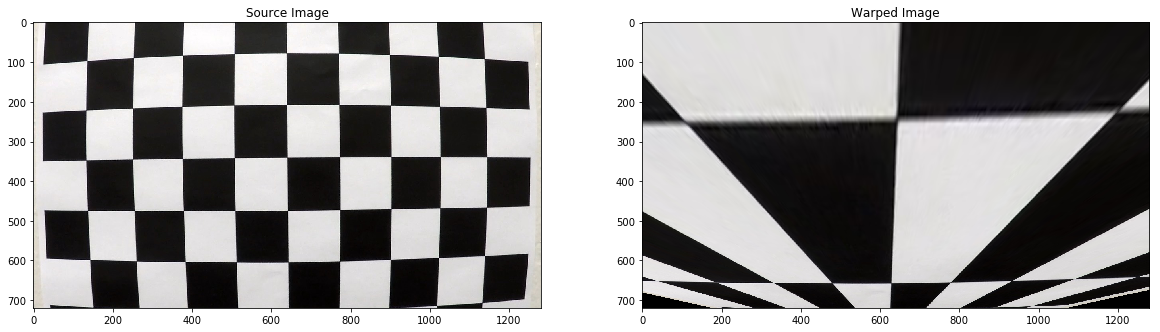

In [9]:
%matplotlib inline

warped_im = warp(img)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(img)
ax1.set_title('Source Image')
ax2.imshow(warped_im)
ax2.set_title('Warped Image')